In [19]:
!pip uninstall protobuf paddlepaddle -y
!pip install protobuf
!pip install paddlepaddle
!pip install tensorflow

Found existing installation: protobuf 5.29.3
Uninstalling protobuf-5.29.3:
  Successfully uninstalled protobuf-5.29.3
Found existing installation: paddlepaddle 2.6.2
Uninstalling paddlepaddle-2.6.2:
  Successfully uninstalled paddlepaddle-2.6.2
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
  Using cached paddlepaddle-2.6.2-cp312-cp312-win_amd64.whl.metadata (8.7 kB)
  Using cached protobuf-3.20.2-py2.py3-none-any.whl.metadata (720 bytes)
Using cached paddlepaddle-2.6.2-cp312-cp312-win_amd64.whl (81.1 MB)
Using cached protobuf-3.20.2-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.3
    Uninstalling protobuf-5.29.3:
      Successfully uninstalled protobuf-5.29.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.18.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl (434 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddlepaddle 2.6.2 requires protobuf<=3.20.2,>=3.1.0; platform_system == "Windows", but you have protobuf 5.29.3 which is incompatible.


In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import Input

In [4]:
# 1. 生成模拟数据
X, y = make_classification(
    n_samples=1000,  # 样本数量
    n_features=20,   # 特征数量
    n_classes=2,     # 类别数量
    n_informative=15, # 有效特征数量
    random_state=42
)

In [5]:
# 数据标准化
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 2. 构建反向传播神经网络 (BPNN)
# 定义模型
model = tf.keras.Sequential([
    Input(shape=(X.shape[1],)),  # 显式定义输入形状
    tf.keras.layers.Dense(64, activation='relu'),  # 隐藏层1
    tf.keras.layers.Dense(32, activation='relu'),  # 隐藏层2
    tf.keras.layers.Dense(1, activation='sigmoid') # 输出层
])

In [10]:
# 编译模型
model.compile(optimizer='adam',  # 使用Adam优化器
              loss='binary_crossentropy',  # 二分类交叉熵损失函数
              metrics=['accuracy'])  # 评估指标

In [11]:
# 3. 训练模型
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6250 - loss: 0.6418 - val_accuracy: 0.7875 - val_loss: 0.5416
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7746 - loss: 0.5280 - val_accuracy: 0.8375 - val_loss: 0.4513
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8205 - loss: 0.4411 - val_accuracy: 0.8500 - val_loss: 0.3855
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3633 - val_accuracy: 0.8500 - val_loss: 0.3386
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8837 - loss: 0.3085 - val_accuracy: 0.8625 - val_loss: 0.3050
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9092 - loss: 0.2708 - val_accuracy: 0.8562 - val_loss: 0.2815
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9229 - loss: 0.2322 - val_accuracy: 0.8687 - val_loss: 0.2621
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9392 - loss: 0.2111 - val_accuracy: 0.8813 - val_loss:

In [12]:
# 4. 测试模型
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Accuracy: 0.91


In [13]:
# 5. 输出训练结果
import matplotlib.pyplot as plt

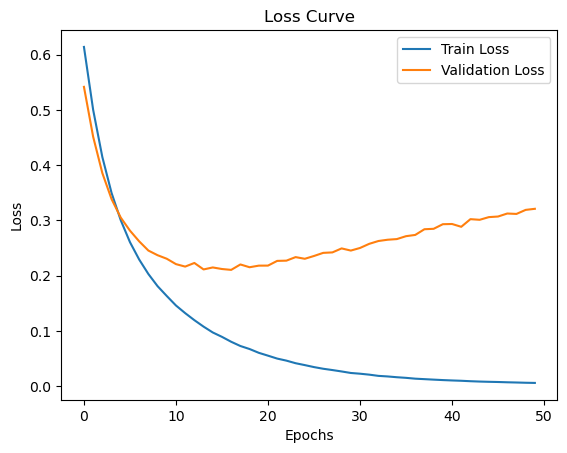

In [14]:
# 绘制训练和验证的损失曲线
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()